# NB2. Centrality Measures

In [1]:
#Import libraries
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## A. Krackhardt Kite Graph [30 pts]

In this section you will work with **Degree, Closeness and Betweeness Centrality** using Network X. The documentation about Centrality can be found [here](https://networkx.github.io/documentation/stable/reference/algorithms/centrality.html).
### Degree Centrality
I.  Create a NetworkX Graph of Krackhardt Kite Graph (1990):


<img src="fig1.png" width="180"> </img>

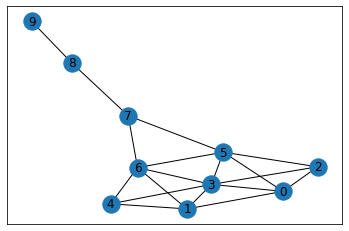

In [2]:
a = nx.krackhardt_kite_graph(create_using=None)
nx.draw_networkx(a)
plt.show()

In [3]:
G = nx.krackhardt_kite_graph(create_using=None)

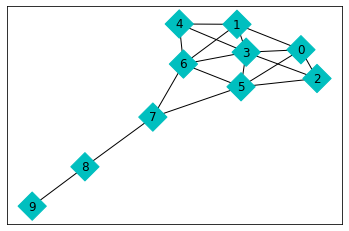

In [4]:
colors = ['c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c', 'c']
sizes = [400, 400, 400, 400, 400, 400, 400, 400, 400, 400]
labels = {0: '0', 1:'1', 2:'2', 3:'3', 4:'4', 5:'5', 6:'6', 7:'7',
8:'8', 9:'9'}

nx.draw_networkx(G, node_color=colors,
node_shape='D',with_labels=True, labels=labels,node_size=sizes)
plt.show()

II. Which are the most important nodes in the Kite Graph based on the Degree Centrality?

In [5]:
deg_cen = nx.degree_centrality(G)
#sorted(deg_cen)
print(deg_cen)

{0: 0.4444444444444444, 1: 0.4444444444444444, 2: 0.3333333333333333, 3: 0.6666666666666666, 4: 0.3333333333333333, 5: 0.5555555555555556, 6: 0.5555555555555556, 7: 0.3333333333333333, 8: 0.2222222222222222, 9: 0.1111111111111111}


In [6]:
sorting = sorted(deg_cen.items(), key=lambda x: x[1], reverse=True)
sorting[0:4]

[(3, 0.6666666666666666),
 (5, 0.5555555555555556),
 (6, 0.5555555555555556),
 (0, 0.4444444444444444)]

In Directed Networks, the in-degree and out-degree can be obtained as follows:
```Python
indegC = nx.in_degree_centrality(Graph)
outdegC = nx.out_degree_centrality(Graph)
```

### Closeness Centrality
III. Recreate a NetworkX Graph and compute the Closeness Centraliy of node 1:
<img src="fig3.png" width="180"> </img>

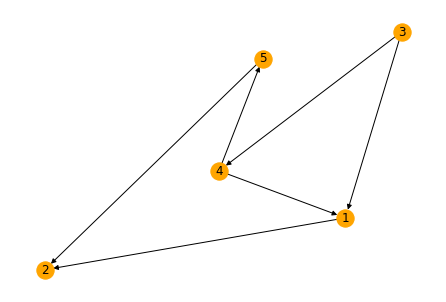

In [7]:
D = nx.DiGraph()

D.add_edges_from([(1,2),(3,1),(3,4),(4,1),(4,5),(5,2)])

nx.draw(D, with_labels=True,node_color='orange')

In [8]:
clos_cen = nx.closeness_centrality(D)

In [9]:
clos_cen1 = nx.closeness_centrality(D,u=1)

In [10]:
print("The Closeness Centraliy of node 1 is equal to =", clos_cen)

The Closeness Centraliy of node 1 is equal to = {1: 0.5, 2: 0.6666666666666666, 3: 0.0, 4: 0.25, 5: 0.3333333333333333}


IV. Which are the most important nodes in the Kite Graph based on the Closeness Centrality?

In [11]:
print("Most important nodes in the Kite Graph based on the Closeness Centrality are the following: \n",sorted(clos_cen.items(), key=lambda x: x[1],reverse=True)[0:3])

Most important nodes in the Kite Graph based on the Closeness Centrality are the following: 
 [(2, 0.6666666666666666), (1, 0.5), (5, 0.3333333333333333)]


### Betweeness Centrality
V. Recreate a NetworkX Graph for the following graph and find the node with the highest Betweenness Centrality:
<img src="fig2.png" width="180"> </img>

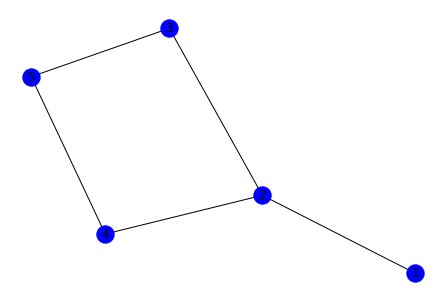

In [12]:
G = nx.Graph()

G.add_nodes_from([1,2,3,4,5])

G.add_edges_from([(1,2),(2,3),(2,4),(3,5),(4,5)])

nx.draw(G, with_labels=True,node_color='blue')

Compute $C_{btw}$ of all nodes can be very computationally expensive. Instead computing $C_{btw}$ with all pairs of nodes. It can bet approximated using a sample of nodes (k). 
```Python
btwC_G = nx.betweenness_centrality(G, k = 25)
```

VI. Which are the most important nodes in the Kite Graph based on the Betweenness Centrality?

In [13]:
betweenness = nx.centrality.betweenness_centrality(G)
highest_betweenness_node = max(G.nodes, key=betweenness.get)
print("The highest Betweenness Centrality node is: ",highest_betweenness_node)

The highest Betweenness Centrality node is:  2


In [14]:
print("Therefore\nThe most important nodes in the Kite Graph based on the Betweenness Centrality are the following:\n",sorted(betweenness.items(), key=lambda x: x[1],reverse=True)[0:2])

Therefore
The most important nodes in the Kite Graph based on the Betweenness Centrality are the following:
 [(2, 0.5833333333333333), (3, 0.16666666666666666)]


VII. Elaborate a Comparative Table of the most important nodes (1st, 2nd and 3rd) in the Kite Graph. In case of tie, include all nodes with the same centrality value.

## B. Eigenvector and Katz Centrality [30 pts]
In this section, you will obtain the **Eigenvector and Katz Centrality** for small networks. Additionally, you will compare this results with the theoretical description. 

The section is based on the chapter Zafarani, Reza et. al. (2014). *Network Measures from Social Media Mining.* Cambridge University Press.

### Eigenvector Centrality
VIII. Consider the following network:
<img src="fig4.png" width="180"> </img>
Represent it using NetworkX and its adjacency matrix using Numpy (Be careful about the order in the matrix).

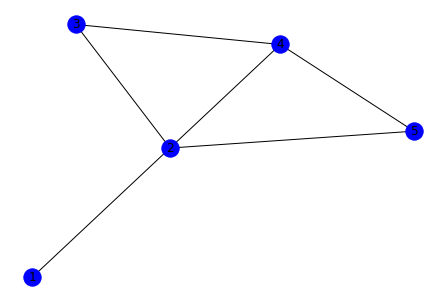

In [15]:
G = nx.Graph()

G.add_nodes_from([1,2,3,4,5])

G.add_edges_from([(5,2),(2,3),(4,2),(2,1),(3,4),(1,2),(5,4)])

nx.draw(G, with_labels=True,node_color='blue')

In [16]:
matrix = nx.to_numpy_matrix(G, nodelist=[0,1,2,3,4,5])
print(matrix)

[[0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 1. 1. 1.]
 [0. 0. 1. 0. 1. 0.]
 [0. 0. 1. 1. 0. 1.]
 [0. 0. 1. 0. 1. 0.]]


IX. Obtain the Eigenvector Centrality using NetworkX.

In [17]:
eig_net = nx.eigenvector_centrality(G)
print(eig_net)

{1: 0.21691733875073668, 2: 0.5825392535755106, 3: 0.4119170973700677, 4: 0.5236826290621273, 5: 0.4119170973700677}


X. Obtain the Eigenvector Centrality using the Matrix Definition.

In [18]:
#nx.eigenvector_centrality(matrix)

In [19]:
#pd.read_numpy_matrix(matrix)

### Katz Centrality

XI. Obtain the Katz Centrality using NetworkX considering:
* $\alpha = 0.25$
* $\beta = 0.2$

In [20]:
XI = nx.katz_centrality(G, alpha=0.25, beta=0.2)
print(XI)

{1: 0.29254175243684233, 2: 0.5600080132056173, 3: 0.41791649380799795, 4: 0.5014997075105204, 5: 0.41791649380799795}


XII. Obtain the Katz Centrality using the Matrix Definition considering:
* $\alpha = 0.25$
* $\beta = 0.2$

In [21]:
XII = nx.katz_centrality(G, alpha=0.25, beta=0.2)
print(XII)

{1: 0.29254175243684233, 2: 0.5600080132056173, 3: 0.41791649380799795, 4: 0.5014997075105204, 5: 0.41791649380799795}


### C. Use Case:  E-mail Network [40 pts]

Consider the following E-Mail Network (Ryan A. Rossi andNesreen K. Ahmed, 2015) in a University (http://networkrepository.com/email-univ.php).

Complete the following instructions:

I. [5 pts] Compute the following Network Parameters: Number of Nodes, Number of Edges, Maximum and Minimum Degree, Average Clustering Coefficient and Transitivity.

In [22]:
fh1=open("email-univ.edges", 'rb')
email=nx.read_edgelist(fh1)
#fh3=open("email-univ.edges", 'rb')

In [23]:
facebook = [email]


# Compute using Networkx as nx
to_df_1 = []
for i in facebook:
    num_nodes = nx.number_of_nodes(i)
    num_links = nx.number_of_edges(i)
    degree_sequence = sorted([d for n, d in nx.degree(i)], reverse=True)
    min_degree = min(degree_sequence)
    max_degree = max(degree_sequence)
    avg_clust_coef = nx.average_clustering(i)
    transivity = nx.transitivity(i)
    lis_of_them = [num_nodes, num_links, min_degree, max_degree, avg_clust_coef, transivity]
    to_df_1.append(lis_of_them)

In [24]:
df1 = pd.DataFrame(data=to_df_1, columns=['num_nodes', 'num_links', 'min_degree', 'max_degree', 'avg_clust_coef', 'transivity'])
df1

,num_nodes,num_links,min_degree,max_degree,avg_clust_coef,transivity
0,1133,5451,1,71,0.220176,0.16625


II. [5 pts] Consider that when a student sends an email, a communication channel is created. If we consider that the information can be exchanged both ways, is it possible to go from one student/professor to every other?

In [25]:
def II(network):
    net = network
    return nx.is_connected(nx.to_undirected(net))

In [26]:
def is_possible():
    if II(email) is True:
        return "Yes, it is possible to go from one student/professor to every other"
    else:
        return "Negative, it is not possible"

In [27]:
is_possible()

'Yes, it is possible to go from one student/professor to every other'

III. [30 pts]Consider you want to share a Student Promotion Code in the Network and a student needs to be selected. We expect that the student who receives it will send to her friends. Based on the following restrictions which student will you choose:

(a)  The Student Promotion Code can be forwarded to multiple users at the same time but the distance is limited to one step, i.e. if the distances is more than one step, it is no longer valid. 

(b) The distance limitation is removed, so the every student will receive the code eventually. Which node should be choosen if we want to ensure that it reaches the students in the lowest average number of emails?

(c) In order to disrupt the distribution, which students must be targeted to stop replying if we choose information-bridge students? 

* a

In [28]:
degree_cen = nx.degree_centrality(email)
degree_cen_sor = sorted(degree_cen.items(), key=lambda x: x[1], reverse=True)
print('I will choose the student{}'.format(degree_cen_sor[0:1]))

I will choose the student[('105', 0.0627208480565371)]


* b

In [29]:
close_cen = nx.closeness_centrality(email)
close_cen_sor = sorted(close_cen.items(), key=lambda x: x[1], reverse=False)
print('I will choose the student{}'.format(close_cen_sor[0:1]))

I will choose the student[('1133', 0.18216929514000643)]


* c

In [30]:
betw_cen = nx.betweenness_centrality(email)
betw_cen_sor = sorted(betw_cen.items(), key=lambda x: x[1], reverse=True)
print('I will choose the student{}'.format(betw_cen_sor[0:1]))

I will choose the student[('333', 0.03948985782790013)]


**NOTE** An interesting use case can be found in Chapter: Centrality, Power and Bottlenecks from Social Network Analysis for Startups. Maksim Tsvetovat & Alexander Kouznetsou (2011) Social Network Analysis for Startups.

## References
Problem C. Use Case: E-mail Network is based on an exersice on Applied Social Network Analysis in Python at Coursera.